In [1]:
%%markdown

# OpenTelemetry metrics examples

> This notebook is part of our ***OpenTelemetry for Developers, Data Engineers and Data Scientists*** series.
>
> It is strongly recommended that you first go through the [basics of OpenTelemetry data.](basics.ipynb)

In this demo notebook we'll further process OpenTelemetry `metrics` data that was emitted by a [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) and recorded into Apache Parquet files by 
the [OTLP Parquet Server](https://github.com/mishmash-io/opentelemetry-server-embedded/tree/main/server-parquet).

We'll be using data that is not in the ***raw*** OpenTelemetry format. [The basics notebook](basics.ipynb) does some preprocessing on the raw data
and saves it in another format that's more suitable for the examples here. It also introduces concepts like `signals` and `signal correlation`, `resources`,
`scopes`, `attributes` and other. These are not covered here, but are important to understand the examples below.

#### First, some imports:


# OpenTelemetry metrics examples

> This notebook is part of our ***OpenTelemetry for Developers, Data Engineers and Data Scientists*** series.
>
> It is strongly recommended that you first go through the [basics of OpenTelemetry data.](basics.ipynb)

In this demo notebook we'll further process OpenTelemetry `metrics` data that was emitted by a [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) and recorded into Apache Parquet files by 
the [OTLP Parquet Server](https://github.com/mishmash-io/opentelemetry-server-embedded/tree/main/server-parquet).

We'll be using data that is not in the ***raw*** OpenTelemetry format. [The basics notebook](basics.ipynb) does some preprocessing on the raw data
and saves it in another format that's more suitable for the examples here. It also introduces concepts like `signals` and `signal correlation`, `resources`,
`scopes`, `attributes` and other. These are not covered here, but are important to understand the examples below.

#### First, some imports:


In [2]:
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plot
import numpy as np

In [3]:
# configure how Pandas DataFrames are displayed:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth = 100

In [4]:
%%markdown

# Load the preprocessed metrics as a Pandas DataFrame

This preprocessed Apache Parquet file was saved by a previous run of the [basics notebook.](basics.ipynb)


# Load the preprocessed metrics as a Pandas DataFrame

This preprocessed Apache Parquet file was saved by a previous run of the [basics notebook.](basics.ipynb)


In [5]:
metrics_df = pd.read_parquet('otel-demo-app/metrics.parquet', engine='pyarrow')

In [6]:
%%markdown

# Browse a few records of the preprocessed metrics data

As a quick reference to our input data we're including a table below with a few records.

More details follow, but for now, take a look at the following columns:

- `name`, `description` and `unit` that describe a `metric`
- `type`, and the sets of `gauge_*`, `sum_*` and `histogram_*` columns
- `start_time_unix_nano` and `time_unix_nano` are used to specify the `metric` observation time interval
- the various `attributes` in the `a_*` columns, these identify the data points of a `metric`
- `scope_name`, `scope_version` and the `resource` (in the `ra_*` columns) tell **who** emitted a `metric` data point

***Note:*** The table might be quite wide, use the horizontal scroller at the bottom to see all columns.



# Browse a few records of the preprocessed metrics data

As a quick reference to our input data we're including a table below with a few records.

More details follow, but for now, take a look at the following columns:

- `name`, `description` and `unit` that describe a `metric`
- `type`, and the sets of `gauge_*`, `sum_*` and `histogram_*` columns
- `start_time_unix_nano` and `time_unix_nano` are used to specify the `metric` observation time interval
- the various `attributes` in the `a_*` columns, these identify the data points of a `metric`
- `scope_name`, `scope_version` and the `resource` (in the `ra_*` columns) tell **who** emitted a `metric` data point

***Note:*** The table might be quite wide, use the horizontal scroller at the bottom to see all columns.


In [7]:
metrics_df.head(10)

,scope_name,scope_version,name,description,unit,type,gauge_type,gauge_int,gauge_double,sum_type,sum_int,sum_double,histogram_count,histogram_sum,histogram_min,histogram_max,histogram_bucket_counts,histogram_explicit_bounds,start_time_unix_nano,time_unix_nano,aggregation_temporality,is_monotonic,a_app.ads.ad_request_type,a_app.ads.ad_response_type,a_app.payment.currency,a_aspnetcore.routing.is_fallback,a_aspnetcore.routing.match_status,a_client-id,a_count,a_cpu,a_currency_code,a_device,a_direction,a_dropped,a_error.message,a_family,a_feature_flag.key,a_feature_flag.provider_name,a_feature_flag.reason,a_feature_flag.variant,a_generation,a_http.flavor,a_http.host,a_http.method,a_http.request.method,a_http.response.status_code,a_http.route,a_http.scheme,a_http.status_class,a_http.status_code,a_http.url,a_jvm.gc.action,a_jvm.gc.name,a_jvm.memory.pool.name,a_jvm.memory.type,a_jvm.thread.daemon,a_jvm.thread.state,a_method,a_net.host.name,a_net.host.port,a_net.peer.name,a_net.peer.port,a_network.protocol.name,a_network.protocol.version,a_network.transport,a_network.type,a_node-id,a_number_of_items,a_operation,a_partition,a_process.cpu.state,a_processorType,a_protocol,a_recommendation.type,a_rpc.grpc.status_code,a_rpc.method,a_rpc.service,a_rpc.system,a_server.address,a_server.port,a_service.name,a_span.kind,a_span.name,a_state,a_status,a_status.code,a_success,a_target,a_topic,a_type,a_url.scheme,ra_container.id,ra_host.arch,ra_host.name,ra_k8s.deployment.name,ra_k8s.namespace.name,ra_k8s.node.name,ra_k8s.pod.ip,ra_k8s.pod.name,ra_k8s.pod.start_time,ra_k8s.pod.uid,ra_os.description,ra_os.name,ra_os.type,ra_os.version,ra_process.command,ra_process.command_args,ra_process.command_line,ra_process.executable.name,ra_process.executable.path,ra_process.owner,ra_process.pid,ra_process.runtime.description,ra_process.runtime.name,ra_process.runtime.version,ra_service.instance.id,ra_service.name,ra_service.namespace,ra_service.version,ra_telemetry.auto.version,ra_telemetry.distro.name,ra_telemetry.distro.version,ra_telemetry.sdk.language,ra_telemetry.sdk.name,ra_telemetry.sdk.version
0,otelcol/httpcheckreceiver,0.105.0,httpcheck.duration,Measures the duration of the HTTP check.,ms,GAUGE,AS_INT,2,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],1723626930335324612,1723626931381380943,None,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,http://opentelemetry-demo-frontendproxy:8080,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,otelcol/httpcheckreceiver,0.105.0,httpcheck.error,Records errors occurring during HTTP check.,{error},SUM,<NA>,<NA>,<NA>,AS_INT,1,0.0,<NA>,<NA>,<NA>,<NA>,[],[],1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Get ""http://opentelemetry-demo-frontendproxy:8080"": dial tcp: lookup opentelemetry-demo-frontend...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,http://opentelemetry-demo-frontendproxy:8080,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,otelcol/httpcheckreceiver,0.105.0,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,<NA>,<NA>,<NA>,AS_INT,0,0.0,<NA>,<NA>,<NA>,<NA>,[],[],1723626930335324612,1723626931381380943,

In [8]:
%%markdown

# Metric names and units

A `metric` has a `name`, a `description` and of course - a `unit` of measure.

These values are typically hard-coded either by you, when instrumenting your app, or by OpenTelemetry **auto-instrumentation plugins.**
Find out more on how meters are created in the [OpenTelemetry metrics API.](https://opentelemetry.io/docs/specs/otel/metrics/api/#instrument)

**Auto-instrumentation plugins** provide a wide variety of 'ready-made' metrics. If you're using a popular framework or library in your development,
chances are OpenTelemetry already has a plugin for it and you don't have to code in order to get telemetry out of it.
                                                                            
To get an idea of the breadth of OpenTelemetry `metrics` and for suggestions on how to implement your own take a look at the following table:  


# Metric names and units

A `metric` has a `name`, a `description` and of course - a `unit` of measure.

These values are typically hard-coded either by you, when instrumenting your app, or by OpenTelemetry **auto-instrumentation plugins.**
Find out more on how meters are created in the [OpenTelemetry metrics API.](https://opentelemetry.io/docs/specs/otel/metrics/api/#instrument)

**Auto-instrumentation plugins** provide a wide variety of 'ready-made' metrics. If you're using a popular framework or library in your development,
chances are OpenTelemetry already has a plugin for it and you don't have to code in order to get telemetry out of it.
                                                                            
To get an idea of the breadth of OpenTelemetry `metrics` and for suggestions on how to implement your own take a look at the following table:  


In [9]:
metrics_df[['name', 'description', 'unit']].drop_duplicates().sort_values(by='name')

,name,description,unit
1610,app.ads.ad_requests,Counts ad requests by request and response type,
1332,app.currency_counter,,
1733,app.frontend.requests,,
1890,app.payment.transactions,,
1747,app_recommendations_counter,Counts the total number of given recommendations,recommendations
1959,aspnetcore.routing.match_attempts,Number of requests that were attempted to be matched to an endpoint.,{match_attempt}
1374,calls,,
1380,duration,,ms
28,feature_flag.flagd.evaluation.reason,Measures the number of evaluations for a given reason.,{reason}
17,feature_flag.flagd.impression,Measures the number of evaluations for a given flag.,{impression}


In [10]:
%%markdown

# A single metric over time

Next, let's get a view of a single `metric` as recorded over time. Pay attention to the `start_time_unix_nano` (which remains fixed) and 
`time_unix_nano` columns.

A given value of a metric data point is always reported over a time interval, with `time_unix_nano` containing ***the end of that time interval.*** 
For this particular metric the value is in the `gauge_int` column, as the `metric` is of `type=GAUGE` and `gauge_type=AS_INT`.

The correct interpretation of the time interval and the value depends on the metric `type` (and potentially some other columns). More on this later. For now, take a look at this Apache Kafka metric:


# A single metric over time

Next, let's get a view of a single `metric` as recorded over time. Pay attention to the `start_time_unix_nano` (which remains fixed) and 
`time_unix_nano` columns.

A given value of a metric data point is always reported over a time interval, with `time_unix_nano` containing ***the end of that time interval.*** 
For this particular metric the value is in the `gauge_int` column, as the `metric` is of `type=GAUGE` and `gauge_type=AS_INT`.

The correct interpretation of the time interval and the value depends on the metric `type` (and potentially some other columns). More on this later. For now, take a look at this Apache Kafka metric:


In [11]:
metrics_df[metrics_df['name'] == 'kafka.lag.max'].dropna(axis=1, how='all').sort_values(by=['start_time_unix_nano', 'time_unix_nano'])

,scope_name,scope_version,name,description,unit,type,gauge_type,gauge_int,gauge_double,histogram_bucket_counts,histogram_explicit_bounds,start_time_unix_nano,time_unix_nano,ra_container.id,ra_host.arch,ra_host.name,ra_k8s.deployment.name,ra_k8s.namespace.name,ra_k8s.node.name,ra_k8s.pod.ip,ra_k8s.pod.name,ra_k8s.pod.start_time,ra_k8s.pod.uid,ra_os.description,ra_os.type,ra_process.command_line,ra_process.executable.path,ra_process.pid,ra_process.runtime.description,ra_process.runtime.name,ra_process.runtime.version,ra_service.instance.id,ra_service.name,ra_service.namespace,ra_service.version,ra_telemetry.distro.name,ra_telemetry.distro.version,ra_telemetry.sdk.language,ra_telemetry.sdk.name,ra_telemetry.sdk.version
3804,io.opentelemetry.jmx,,kafka.lag.max,The max lag in messages between follower and leader replicas,{messages},GAUGE,AS_INT,0,0.0,[],[],1723626936540681556,1723627056546499014,21ff29407d6923d0abc595bfc6add4e77bb6a423dfbda6c4cb6902d40ca9825c,amd64,opentelemetry-demo-kafka-79c66d6644-sm2k4,opentelemetry-demo-kafka,otel-demo-parquet,minikube,10.244.1.47,opentelemetry-demo-kafka-79c66d6644-sm2k4,2024-08-14T09:15:29Z,4076eb9d-ad8c-419c-8905-76a78572ede1,Linux 5.14.0-427.24.1.el9_4.x86_64,linux,/opt/java/openjdk/bin/java -Xmx400M -Xms400M -XX:SharedArchiveFile=/opt/kafka/kafka.jsa -Xlog:gc...,/opt/java/openjdk/bin/java,1.0,Eclipse Adoptium OpenJDK 64-Bit Server VM 21.0.2+13-LTS,OpenJDK Runtime Environment,21.0.2+13-LTS,8f20a94b-32ab-4edb-9572-83d9a2f33d4f,kafka,opentelemetry-demo-parquet,1.11.1,opentelemetry-java-instrumentation,2.4.0,java,opentelemetry,1.38.0
4751,io.opentelemetry.jmx,,kafka.lag.max,The max lag in messages between follower and leader replicas,{messages},GAUGE,AS_INT,0,0.0,[],[],1723626936540681556,1723627116546582933,21ff29407d6923d0abc595bfc6add4e77bb6a423dfbda6c4cb6902d40ca9825c,amd64,opentelemetry-demo-kafka-79c66d6644-sm2k4,opentelemetry-demo-kafka,otel-demo-parquet,minikube,10.244.1.47,opentelemetry-demo-kafka-79c66d6644-sm2k4,2024-08-14T09:15:29Z,4076eb9d-ad8c-419c-8905-76a78572ede1,Linux 5.14.0-427.24.1.el9_4.x86_64,linux,/opt/java/openjdk/bin/java -Xmx400M -Xms400M -XX:SharedArchiveFile=/opt/kafka/kafka.jsa -Xlog:gc...,/opt/java/openjdk/bin/java,1.0,Eclipse Adoptium OpenJDK 64-Bit Server VM 21.0.2+13-LTS,OpenJDK Runtime Environment,21.0.2+13-LTS,8f20a94b-32ab-4edb-9572-83d9a2f33d4f,kafka,opentelemetry-demo-parquet,1.11.1,opentelemetry-java-instrumentation,2.4.0,java,opentelemetry,1.38.0
34168,io.opentelemetry.jmx,,kafka.lag.max,The max lag in messages between follower and leader replicas,{messages},GAUGE,AS_INT,0,0.0,[],[],1723626936540681556,1723627176545319056,21ff29407d6923d0abc595bfc6add4e77bb6a423dfbda6c4cb6902d40ca9825c,amd64,opentelemetry-demo-kafka-79c66d6644-sm2k4,opentelemetry-demo-kafka,otel-demo-parquet,minikube,10.244.1.47,opentelemetry-demo-kafka-79c66d6644-sm2k4,2024-08-14T09:15:29Z,4076eb9d-ad8c-419c-8905-76a78572ede1,Linux 5.14.0-427.24.1.el9_4.x86_64,linux,/opt/java/openjdk/bin/java -Xmx400M -Xms400M -XX:SharedArchiveFile=/opt/kafka/kafka.jsa -Xlog:gc...,/opt/java/openjdk/bin/java,1.0,Eclipse Adoptium OpenJDK 64-Bit Server VM 21.0.2+13-LTS,OpenJDK Runtime Environment,21.0.2+13-LTS,8f20a94b-32ab-4edb-9572-83d9a2f33d4f,kafka,opentelemetry-demo-parquet,1.11.1,opentelemetry-java-instrumentation,2.4.0,java,opentelemetry,1.38.0
35125,io.opentelemetry.jmx,,kafka.lag.max,The max lag in messages between follower and leader replicas,{messages},GAUGE,AS_INT,0,0.0,[],[],1723626936540681556,1723627236544830366,21ff29407d6923d0abc595bfc6add4e77bb6a423dfbda6c4cb6902d40ca9825c,amd64,opentelemetry-demo-kafka-79c66d6644-sm2k4,opentelemetry-demo-kafka,otel-demo-parquet,minikube,10.244.1.47,opentelemetry-demo-kafka-79c66d6644-sm2k4,2024-08-14T09:15:29Z,4076eb9d-ad8c-419c-8905-76a78572ede1,Linux 5.14.0-427.24.1.el9_4.x86_64,linux,/opt/java/openjdk/bin/java -Xmx400M -Xms400M -XX:SharedArchiveFile=/opt/kafka/kafka.jsa -Xlog:gc...,/opt/java/openjdk/bin/java,1.0,Eclipse Adoptium OpenJDK 64-Bit Server

In [12]:
%%markdown

# Metrics can have multiple data points

If you've already been through the [basics notebook](basics.ipynb) you might have realized that the same `metric` (as a `name`, `description`) 
may be emitted by different `resources` or `scopes` - like multiple instances (pods) of a micro service, or separate dependencies in your code that 
provide similar measurements.

When working with `metrics` data it is important to distinguish between various emitters (`resources`, `scopes`, etc), but also keep in mind that ***one 
single metric, emitted by the same resource and scope, at the same timestamp, can have multiple data points.***

Take a look at the `system.cpu.utilization` metric below, and especially at the `a_cpu` and `a_state` attribute columns. The same metric, reported by 
the same `resource` has individual data points for each CPU and each CPU state (`idle`, `user`, `system`...):


# Metrics can have multiple data points

If you've already been through the [basics notebook](basics.ipynb) you might have realized that the same `metric` (as a `name`, `description`) 
may be emitted by different `resources` or `scopes` - like multiple instances (pods) of a micro service, or separate dependencies in your code that 
provide similar measurements.

When working with `metrics` data it is important to distinguish between various emitters (`resources`, `scopes`, etc), but also keep in mind that ***one 
single metric, emitted by the same resource and scope, at the same timestamp, can have multiple data points.***

Take a look at the `system.cpu.utilization` metric below, and especially at the `a_cpu` and `a_state` attribute columns. The same metric, reported by 
the same `resource` has individual data points for each CPU and each CPU state (`idle`, `user`, `system`...):


In [13]:
metrics_df[metrics_df['name'] == 'system.cpu.utilization'][
    [
        'name',
        'description',
        'unit',
        'type',
        'gauge_type',
        'gauge_double',
        'time_unix_nano',
        # metric data point attributes
        'a_cpu',
        'a_state',
        # resource and scope
        'ra_service.name',
        'scope_name',
        'ra_k8s.pod.uid'
    ]
].head(50)

,name,description,unit,type,gauge_type,gauge_double,time_unix_nano,a_cpu,a_state,ra_service.name,scope_name,ra_k8s.pod.uid
75,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,1.0,idle,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
76,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,1.0,user,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
77,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,1.0,system,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
78,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,1.0,irq,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
79,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,2.0,idle,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
80,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,2.0,user,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
81,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,2.0,system,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
82,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,2.0,irq,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
83,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,3.0,idle,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c
84,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0.0,1723626943634161700,3.0,user,loadgenerator,opentelemetry.instrumentation.system_metrics,c8245f82-76f9-409b-848b-1f322ab0558c


In [14]:
%%markdown

## Simplify our data a bit

To avoid very wide tables, let's replace all `resource` attributes (in the `ra_*` columns) with a single id that we can use to separate `metrics` by 
their emitters.

We'll call this derived column `emitter`.

***Note:*** We have previously checked that the `scope_name` and `ra_service.name` columns are enough for this demo data set. For other data sets 
they will not suffice to uniquely identify each emitter!


## Simplify our data a bit

To avoid very wide tables, let's replace all `resource` attributes (in the `ra_*` columns) with a single id that we can use to separate `metrics` by 
their emitters.

We'll call this derived column `emitter`.

***Note:*** We have previously checked that the `scope_name` and `ra_service.name` columns are enough for this demo data set. For other data sets 
they will not suffice to uniquely identify each emitter!


In [15]:
metrics_df['emitter'] = metrics_df['scope_name'] + '@' + metrics_df['ra_service.name']
metrics_df = metrics_df[[c for c in metrics_df.columns if c[:3] != 'ra_' and c not in ['scope_name', 'scope_version']]]

In [16]:
%%markdown

# Metric types

With OpenTelemetry, your code creates a 'meter' of a given type, like a [Gauge](https://opentelemetry.io/docs/specs/otel/metrics/api/#gauge-creation), 
a [Counter](https://opentelemetry.io/docs/specs/otel/metrics/api/#counter-creation),
an [UpDownCounter](https://opentelemetry.io/docs/specs/otel/metrics/api/#updowncounter-creation),
or a [Histogram](https://opentelemetry.io/docs/specs/otel/metrics/api/#histogram-creation). Then, during run-time, your code will typically 'add' 
new values to this meter to update it. (With some meters your code can also 'subtract').

These updates though might happen too often and cause lots of network traffic just to report the changes in the `metric`. Think of a very busy web app,
that is counting the number of incoming requests. Updates may be happening hundreds or thousands of times per second!

To avoid heavy resource usage OpenTelemetry will 'aggregate' each metric and report a single value for it over a given time interval. The way it has 
'aggergated' a metric is saved in the `type` column:


# Metric types

With OpenTelemetry, your code creates a 'meter' of a given type, like a [Gauge](https://opentelemetry.io/docs/specs/otel/metrics/api/#gauge-creation), 
a [Counter](https://opentelemetry.io/docs/specs/otel/metrics/api/#counter-creation),
an [UpDownCounter](https://opentelemetry.io/docs/specs/otel/metrics/api/#updowncounter-creation),
or a [Histogram](https://opentelemetry.io/docs/specs/otel/metrics/api/#histogram-creation). Then, during run-time, your code will typically 'add' 
new values to this meter to update it. (With some meters your code can also 'subtract').

These updates though might happen too often and cause lots of network traffic just to report the changes in the `metric`. Think of a very busy web app,
that is counting the number of incoming requests. Updates may be happening hundreds or thousands of times per second!

To avoid heavy resource usage OpenTelemetry will 'aggregate' each metric and report a single value for it over a given time interval. The way it has 
'aggergated' a metric is saved in the `type` column:


In [17]:
metrics_df[['type']].drop_duplicates()

,type
0,GAUGE
1,SUM
7,HISTOGRAM


In [18]:
%%markdown

# Gauge metrics

OpenTelemetry 'aggregates' GAUGE metrics to their **last** value for the observation period. No matter how many times they change during that time - only 
the final value of the Gauge is reported, that is - the value the Gauge had at `time_unix_nano`:


# Gauge metrics

OpenTelemetry 'aggregates' GAUGE metrics to their **last** value for the observation period. No matter how many times they change during that time - only 
the final value of the Gauge is reported, that is - the value the Gauge had at `time_unix_nano`:


In [19]:
gauges_df=metrics_df[metrics_df['type'] == 'GAUGE']
gauges_df[['name', 'description', 'unit', 'type', 'gauge_type', 'gauge_int', 'gauge_double', 'a_cpu', 'a_state', 'time_unix_nano']].head(10)

,name,description,unit,type,gauge_type,gauge_int,gauge_double,a_cpu,a_state,time_unix_nano
0,httpcheck.duration,Measures the duration of the HTTP check.,ms,GAUGE,AS_INT,2,0.0,<NA>,<NA>,1723626931381380943
75,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,1.0,idle,1723626943634161700
76,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,1.0,user,1723626943634161700
77,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,1.0,system,1723626943634161700
78,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,1.0,irq,1723626943634161700
79,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,2.0,idle,1723626943634161700
80,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,2.0,user,1723626943634161700
81,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,2.0,system,1723626943634161700
82,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,2.0,irq,1723626943634161700
83,system.cpu.utilization,System CPU utilization,1,GAUGE,AS_DOUBLE,0,0.0,3.0,idle,1723626943634161700


In [20]:
%%markdown

## Plot some Gauges

To illustrate how to work with Gauge `metrics` - let's plot some CPU usage, as reported by OpenTelemetry:


## Plot some Gauges

To illustrate how to work with Gauge `metrics` - let's plot some CPU usage, as reported by OpenTelemetry:


In [21]:
# select the 'system.cpu.utilization' metric of the demo Recommendation service:
selector = (metrics_df['name'] == 'system.cpu.utilization') & (metrics_df['emitter'] == 'opentelemetry.instrumentation.system_metrics@recommendationservice')
# get only the Gauges of cpu 1 and 2:
selector_cpu1 = metrics_df['a_cpu'] == 1.0
selector_cpu2 = metrics_df['a_cpu'] == 2.0
# and the gauges for system and user cpu states:
selector_system = metrics_df['a_state'] == 'system'
selector_user = metrics_df['a_state'] == 'user'

# prepare our DataFrames using the selectors above:
cpu1_system = metrics_df[(selector) & (selector_cpu1) & (selector_system)][['time_unix_nano', 'gauge_double']].sort_values(by='time_unix_nano')
cpu1_user = metrics_df[(selector) & (selector_cpu1) & (selector_user)][['time_unix_nano', 'gauge_double']].sort_values(by='time_unix_nano')
cpu2_system = metrics_df[(selector) & (selector_cpu2) & (selector_system)][['time_unix_nano', 'gauge_double']].sort_values(by='time_unix_nano')
cpu2_user = metrics_df[(selector) & (selector_cpu2) & (selector_user)][['time_unix_nano', 'gauge_double']].sort_values(by='time_unix_nano')

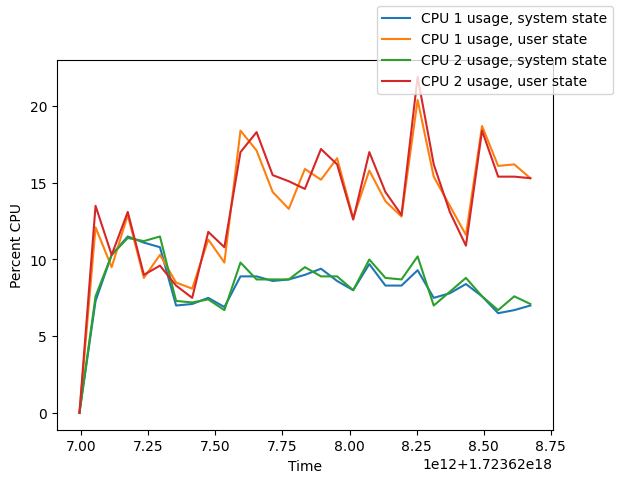

In [22]:
# plot CPU 1 and 2 utilization, across user and system states. Reported values are in percent, but in 0..1 format, so, multiply by 100:
fig = plot.figure()
plot.plot(cpu1_system['time_unix_nano'], cpu1_system['gauge_double'] * 100.0, label='CPU 1 usage, system state')
plot.plot(cpu1_user['time_unix_nano'], cpu1_user['gauge_double'] * 100.0, label='CPU 1 usage, user state')
plot.plot(cpu2_system['time_unix_nano'], cpu2_system['gauge_double'] * 100.0, label='CPU 2 usage, system state')
plot.plot(cpu2_user['time_unix_nano'], cpu2_user['gauge_double'] * 100.0, label='CPU 2 usage, user state')
plot.xlabel('Time')
plot.ylabel('Percent CPU')
fig.legend()

In [23]:
%%markdown

## Gauge values

A Gauge can be integer- or double-valued. As seen in the tables above, this will be noted in the `gauge_type` column, and the corresponding value in 
`gauge_int` or `gauge_double.`

To avoid checking each time which value column to use, let's get a single column, `value`, for all gauges:


## Gauge values

A Gauge can be integer- or double-valued. As seen in the tables above, this will be noted in the `gauge_type` column, and the corresponding value in 
`gauge_int` or `gauge_double.`

To avoid checking each time which value column to use, let's get a single column, `value`, for all gauges:


In [24]:
# get the gauge values to a single column:
gauges_values_df=pd.concat([
    gauges_df[gauges_df['gauge_type'] == 'AS_INT'][['gauge_int']].rename(columns={'gauge_int': 'value'}),
    gauges_df[gauges_df['gauge_type'] == 'AS_DOUBLE'][['gauge_double']].rename(columns={'gauge_double': 'value'})
])
# gauges_values_df will be needed later

In [25]:
%%markdown

# Sum metrics

As you might have guessed - with Gauge `metrics` details on what happened **during** the interval are completely lost. To provide some extra information, but 
still report only one single value for a given time period - OpenTelemetry also has Sum `metrics.`

Sum `metrics` are aggregated as a sum of all changes during a time interval. Two more columns are added to further specify how this sum should 
be used.

The `aggregation_temporality` specifies if the sum is:
- DELTA - only recording the change since last reported time interval (since last `time_unix_nano` until current `time_unix_nano`)
- CUMULATIVE - recording the sum from `start_time_unix_nano` until current `time_unix_nano`, or in other words - since observations began

The introduction of `start_time_unix_nano` is a notable improvement of OpenTelemetry on earlier telemetry packages. Its use is optional, but strongly 
recommended as it allows you to identify gaps in metric reporting.

Basically, when OpenTelemetry starts - it will get the current timestamp and keep it in `start_time_unix_nano`. As it continues to work - the same 
`start_time_unix_nano` will be reported each time. If it encounters an error that prevents it from reporting continuos time intervals, that is - 
data of a time interval is potentially lost - it will 'reset' to a new value of `start_time_unix_nano` and continue reporting this new timestamp.
When processing your telemetry data - if you see a changing `start_time_unix_nano` - it's a sure sign you have got a gap. 

A simple example of this is if your app crashes and gets restarted - it's obvious that there will be no reports of a metric during the restart, 
but without a changing `start_time_unix_nano` you will not have an easy way to notice this!

Another way of looking at it is to think of the `start_time_unix_nano` as a **session-like** parameter. A `metric` is observed at continuous time intervals during a **session**.
The end of each observation interval will be saved in `time_unix_nano` and the **session** - in `start_time_unix_nano`.

The second additional column for Sum metrics is a boolean-valued `is_monotonic` column. When `True`, the sum is constantly increasing, like for example - 
when counting the number of processed requests - it never goes down!

Keep reading for more examples.


# Sum metrics

As you might have guessed - with Gauge `metrics` details on what happened **during** the interval are completely lost. To provide some extra information, but 
still report only one single value for a given time period - OpenTelemetry also has Sum `metrics.`

Sum `metrics` are aggregated as a sum of all changes during a time interval. Two more columns are added to further specify how this sum should 
be used.

The `aggregation_temporality` specifies if the sum is:
- DELTA - only recording the change since last reported time interval (since last `time_unix_nano` until current `time_unix_nano`)
- CUMULATIVE - recording the sum from `start_time_unix_nano` until current `time_unix_nano`, or in other words - since observations began

The introduction of `start_time_unix_nano` is a notable improvement of OpenTelemetry on earlier telemetry packages. Its use is optional, but strongly 
recommended as it allows you to identify gaps in metric reporting.

Basically, when OpenTelemetry starts - it will get the current timestamp and keep it in `start_time_unix_nano`. As it continues to work - the same 
`start_time_unix_nano` will be reported each time. If it encounters an error that prevents it from reporting continuos time intervals, that is - 
data of a time interval is potentially lost - it will 'reset' to a new value of `start_time_unix_nano` and continue reporting this new timestamp.
When processing your telemetry data - if you see a changing `start_time_unix_nano` - it's a sure sign you have got a gap. 

A simple example of this is if your app crashes and gets restarted - it's obvious that there will be no reports of a metric during the restart, 
but without a changing `start_time_unix_nano` you will not have an easy way to notice this!

Another way of looking at it is to think of the `start_time_unix_nano` as a **session-like** parameter. A `metric` is observed at continuous time intervals during a **session**.
The end of each observation interval will be saved in `time_unix_nano` and the **session** - in `start_time_unix_nano`.

The second additional column for Sum metrics is a boolean-valued `is_monotonic` column. When `True`, the sum is constantly increasing, like for example - 
when counting the number of processed requests - it never goes down!

Keep reading for more examples.


In [26]:
sums_df=metrics_df[metrics_df['type'] == 'SUM']
sums_df[
    [
        'name', 'description', 'unit', 'type', 'sum_type', 'sum_int', 'sum_double',
        'start_time_unix_nano', 'time_unix_nano', 'aggregation_temporality', 'is_monotonic'
    ]
].head(10)

,name,description,unit,type,sum_type,sum_int,sum_double,start_time_unix_nano,time_unix_nano,aggregation_temporality,is_monotonic
1,httpcheck.error,Records errors occurring during HTTP check.,{error},SUM,AS_INT,1,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
2,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,AS_INT,0,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
3,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,AS_INT,0,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
4,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,AS_INT,0,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
5,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,AS_INT,0,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
6,httpcheck.status,"1 if the check resulted in status_code matching the status_class, otherwise 0.",1,SUM,AS_INT,0,0.0,1723626930335324612,1723626931381380943,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
13,http.server.active_requests,Measures the number of concurrent HTTP requests that are currently in-flight.,{request},SUM,AS_INT,3,0.0,1723626929865432495,1723626941865987025,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
14,http.server.active_requests,Measures the number of concurrent HTTP requests that are currently in-flight.,{request},SUM,AS_INT,0,0.0,1723626929865432495,1723626941865987025,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
15,http.server.active_requests,Measures the number of concurrent HTTP requests that are currently in-flight.,{request},SUM,AS_INT,0,0.0,1723626929865432495,1723626941865987025,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False
16,http.server.active_requests,Measures the number of concurrent HTTP requests that are currently in-flight.,{request},SUM,AS_INT,0,0.0,1723626929865432495,1723626941865987025,b'AGGREGATION_TEMPORALITY_CUMULATIVE',False


In [27]:
%%markdown

## Charting Sums

To illustrate how Sum `metrics` work, let's explore two of them - Java's memory usage (`jvm.memory.used`) and maximum memory it has (`jvm.memory.limit`).

Due to the way Java works, these two `metrics` are reported by **memory type** (heap or non-heap) and **memory pool**. These details are recorded in 
`a_jvm.memory.type` and `a_jvm.memory.pool.name`.

To anyone who has worked with the Java Garbage Collector these will look familiar:


## Charting Sums

To illustrate how Sum `metrics` work, let's explore two of them - Java's memory usage (`jvm.memory.used`) and maximum memory it has (`jvm.memory.limit`).

Due to the way Java works, these two `metrics` are reported by **memory type** (heap or non-heap) and **memory pool**. These details are recorded in 
`a_jvm.memory.type` and `a_jvm.memory.pool.name`.

To anyone who has worked with the Java Garbage Collector these will look familiar:


In [28]:
sums_df[(sums_df['name'] == 'jvm.memory.used')][['a_jvm.memory.pool.name', 'a_jvm.memory.type']].drop_duplicates()

,a_jvm.memory.pool.name,a_jvm.memory.type
1647,CodeHeap 'non-nmethods',non_heap
1648,Tenured Gen,heap
1649,Metaspace,non_heap
1650,CodeHeap 'profiled nmethods',non_heap
1651,Eden Space,heap
1652,Survivor Space,heap
1653,Compressed Class Space,non_heap
1654,CodeHeap 'non-profiled nmethods',non_heap


In [29]:
%%markdown

#### Emitters of java memory metrics

The [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) used to obtain our data set has a few Java services:


#### Emitters of java memory metrics

The [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) used to obtain our data set has a few Java services:


In [30]:
sums_df[(sums_df['name'] == 'jvm.memory.limit')][['emitter']].drop_duplicates()

,emitter
1619,io.opentelemetry.runtime-telemetry-java8@adservice
2013,io.opentelemetry.runtime-telemetry-java8@kafka
2154,io.opentelemetry.runtime-telemetry-java8@frauddetectionservice


In [31]:
%%markdown

#### JVM Heap limits and usage by emitter

Although technically wrong (as each pool has its own limit), for simplicity we'll sum all **heap** pools togheter and report the total limits and usage, per `emitter` and over time:


#### JVM Heap limits and usage by emitter

Although technically wrong (as each pool has its own limit), for simplicity we'll sum all **heap** pools togheter and report the total limits and usage, per `emitter` and over time:


In [32]:
# get JVM heap limits, sum by emitter and timestamp:
heap_limit_df=sums_df[(sums_df['name'] == 'jvm.memory.limit') & (sums_df['a_jvm.memory.type'] == 'heap')][['time_unix_nano', 'emitter', 'sum_int']].groupby(['emitter', 'time_unix_nano']).sum()
heap_limit_df=heap_limit_df.sort_values(['emitter', 'time_unix_nano'])

In [33]:
%%markdown

***Note:*** In the code above we're also ignoring `start_time_unix_nano`. Again, for simplicity. This only works because our demo data set contains a single value of it.

When working with your own data sets - you should always consider it!


***Note:*** In the code above we're also ignoring `start_time_unix_nano`. Again, for simplicity. This only works because our demo data set contains a single value of it.

When working with your own data sets - you should always consider it!


In [34]:
%%markdown

#### Plot the limits for Fraud detection and Kafka demo Astronomy webshop services

Let's take two of our emitters and plot the lines of their total heap memory limits:


#### Plot the limits for Fraud detection and Kafka demo Astronomy webshop services

Let's take two of our emitters and plot the lines of their total heap memory limits:


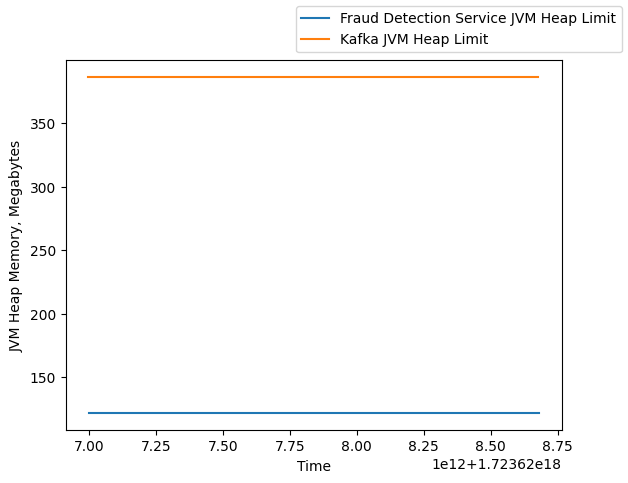

In [35]:
# fraud detection microservice limits:
fraud_limit_df=heap_limit_df.loc['io.opentelemetry.runtime-telemetry-java8@frauddetectionservice']
# kafka limits:
kafka_limit_df=heap_limit_df.loc['io.opentelemetry.runtime-telemetry-java8@kafka']
fig = plot.figure()
# also convert the values to megabytes:
plot.plot(fraud_limit_df.index, fraud_limit_df['sum_int'] / 1024 / 1024, label='Fraud Detection Service JVM Heap Limit')
plot.plot(kafka_limit_df.index, kafka_limit_df['sum_int'] / 1024 / 1024, label='Kafka JVM Heap Limit')
plot.xlabel('Time')
plot.ylabel('JVM Heap Memory, Megabytes')
fig.legend()

In [36]:
# similarly to heap_limit_df above, let's get the heap usage DataFrame. This time we're also including the start_time_unix_nano column:
heap_used_df=sums_df[(sums_df['name'] == 'jvm.memory.used') & (sums_df['a_jvm.memory.type'] == 'heap')][['start_time_unix_nano', 'time_unix_nano', 'emitter', 'sum_int']].groupby(['emitter', 'start_time_unix_nano', 'time_unix_nano']).sum()
heap_used_df=heap_used_df.sort_values(['emitter', 'start_time_unix_nano', 'time_unix_nano'])

In [37]:
%%markdown

#### Now plot both heap limits and heap usage:


#### Now plot both heap limits and heap usage:


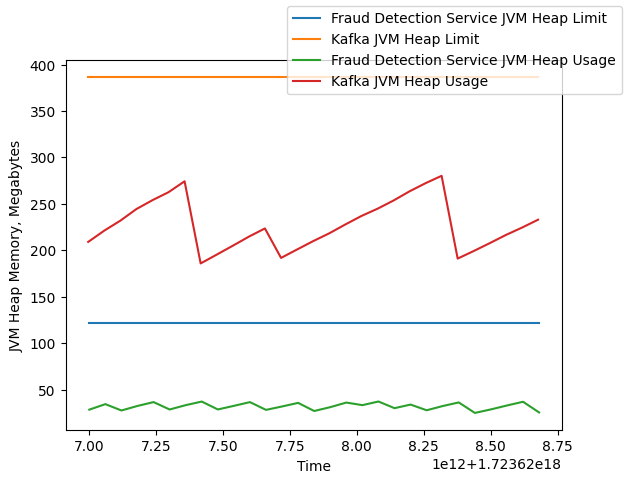

In [38]:
fraud_used_df=heap_used_df.loc['io.opentelemetry.runtime-telemetry-java8@frauddetectionservice']
kafka_used_df=heap_used_df.loc['io.opentelemetry.runtime-telemetry-java8@kafka']
# only use the first value of the 'start_time_unix_nano' index level
fraud_used_df=fraud_used_df.loc[fraud_used_df.index[0][0]]
kafka_used_df=kafka_used_df.loc[kafka_used_df.index[0][0]]

fig = plot.figure()
# plot the same limits from above, in megabytes:
plot.plot(fraud_limit_df.index, fraud_limit_df['sum_int'] / 1024 / 1024, label='Fraud Detection Service JVM Heap Limit')
plot.plot(kafka_limit_df.index, kafka_limit_df['sum_int'] / 1024 / 1024, label='Kafka JVM Heap Limit')
plot.plot(fraud_used_df.index, fraud_used_df['sum_int'] / 1024 / 1024, label='Fraud Detection Service JVM Heap Usage')
plot.plot(kafka_used_df.index, kafka_used_df['sum_int'] / 1024 / 1024, label='Kafka JVM Heap Usage')
plot.xlabel('Time')
plot.ylabel('JVM Heap Memory, Megabytes')
fig.legend()

In [39]:
%%markdown

# Monotonic sums: Golang Garbage Collection

To illustrate **monotonic** Sum `metrics`, we'll consider two of them, both emitted by the Go programming language garbage collector:


# Monotonic sums: Golang Garbage Collection

To illustrate **monotonic** Sum `metrics`, we'll consider two of them, both emitted by the Go programming language garbage collector:


In [40]:
sums_df[sums_df['name'].isin(['process.runtime.go.gc.count', 'process.runtime.go.gc.pause_total_ns'])][['name', 'description', 'unit', 'is_monotonic']].drop_duplicates()

,name,description,unit,is_monotonic
1668,process.runtime.go.gc.count,Number of completed garbage collection cycles,,True
1669,process.runtime.go.gc.pause_total_ns,Cumulative nanoseconds in GC stop-the-world pauses since the program started,,True


In [41]:
%%markdown

#### Build DataFrames for both monotonic sums

Much like with the JVM Heap example above, let's get a couple of DataFrames for both Golang `metrics`. We'll also add a `sum_delta` that will be needed later.

***Note:*** This time our data, as emitted by the Product Catalog demo service, contains a **reset** of the metric observation session!

Scroll through the table below and note how our data contains two distinct values in the `start_time_unix_nano` column for the `go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice` emitter!


#### Build DataFrames for both monotonic sums

Much like with the JVM Heap example above, let's get a couple of DataFrames for both Golang `metrics`. We'll also add a `sum_delta` that will be needed later.

***Note:*** This time our data, as emitted by the Product Catalog demo service, contains a **reset** of the metric observation session!

Scroll through the table below and note how our data contains two distinct values in the `start_time_unix_nano` column for the `go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice` emitter!


In [42]:
gogc_count_df=sums_df[sums_df['name'] == 'process.runtime.go.gc.count'][['start_time_unix_nano', 'time_unix_nano', 'emitter', 'sum_int']].groupby(['emitter', 'start_time_unix_nano', 'time_unix_nano']).sum()
gogc_count_df=gogc_count_df.sort_values(['emitter', 'start_time_unix_nano', 'time_unix_nano'])
# Set the 'sum_delta' column. Use 'start_time_unix_nano' otherwise the delta value will be computed wrongly, over a gap in the data!
gogc_count_df['sum_delta']=gogc_count_df['sum_int'] - gogc_count_df.groupby(['emitter', 'start_time_unix_nano'])['sum_int'].shift(1, fill_value=0)
gogc_count_df

sum_int  \
emitter                                                                   start_time_unix_nano time_unix_nano                 
go.opentelemetry.io/contrib/instrumentation/runtime@checkoutservice       1723626941614721758  1723627001618361658        3   
                                                                                               1723627061614702342        4   
                                                                                               1723627121621386268        4   
                                                                                               1723627181616331119        5   
                                                                                               1723627241634194965        5   
                                                                                               1723627301643904056        6   
                                                                                               1723627361678020214        7   
                                                                                               1723627421852578693        7   
                                                                                               1723627481629346912        8   
                                                                                               1723627541612775287        8   
                                                                                               1723627601619511956        9   
                                                                                               1723627661639162360       10   
                                                                                               1723627721643158342       10   
                                                                                               1723627781635058071       11   
                                                                                               1723627841635962082       11   
                                                                                               1723627901622890303       12   
                                                                                               1723627961622869545       12   
                                                                                               1723628021655380547       13   
                                                                                               1723628081631528372       13   
                                                                                               1723628141624389604       14   
                                                                                               1723628201633682454       14   
                                                                                               1723628261651248577       15   
                                                                                               1723628321806264087       15   
                                                                                               1723628381640261996       16   
                                                                                               1723628441857620713       16   
                                                                                               1723628501620680571       17   
                                                                                               1723628561636406330       17   
                                                                                               1723628622176479004       17   
go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice 1723626931374482015  1723626991377435168        6   
                                                                                               1723627051380024670       11   
                                                    

In [43]:
gogc_pause_df=sums_df[sums_df['name'] == 'process.runtime.go.gc.pause_total_ns'][['start_time_unix_nano', 'time_unix_nano', 'emitter', 'sum_int']].groupby(['emitter', 'start_time_unix_nano', 'time_unix_nano']).sum()
gogc_pause_df=gogc_pause_df.sort_values(['emitter', 'start_time_unix_nano', 'time_unix_nano'])
# Same as above - delta value should not consider earlier timestamps that belong to a different "session":
gogc_pause_df['sum_delta']=gogc_pause_df['sum_int'] - gogc_pause_df.groupby(['emitter', 'start_time_unix_nano'])['sum_int'].shift(1, fill_value=0)
gogc_pause_df

sum_int  \
emitter                                                                   start_time_unix_nano time_unix_nano                   
go.opentelemetry.io/contrib/instrumentation/runtime@checkoutservice       1723626941614724503  1723627001618361868    2690668   
                                                                                               1723627061614702524    2737308   
                                                                                               1723627121621387668    2737308   
                                                                                               1723627181616331386    3689394   
                                                                                               1723627241634195232    3689394   
                                                                                               1723627301643904538   12702497   
                                                                                               1723627361678020407   12732443   
                                                                                               1723627421852578897   12732443   
                                                                                               1723627481629347161   25320002   
                                                                                               1723627541612775526   25320002   
                                                                                               1723627601619512194   25438275   
                                                                                               1723627661639162808   25476749   
                                                                                               1723627721643158744   25476749   
                                                                                               1723627781635058476   25656211   
                                                                                               1723627841635962628   25656211   
                                                                                               1723627901622890509   25734414   
                                                                                               1723627961622869821   25734414   
                                                                                               1723628021655380738   26000865   
                                                                                               1723628081631528582   26000865   
                                                                                               1723628141624389800   38870661   
                                                                                               1723628201633682651   38870661   
                                                                                               1723628261651248800   38944721   
                                                                                               1723628321806264405   38944721   
                                                                                               1723628381640262239   40748449   
                                                                                               1723628441857621070   40748449   
                                                                                               1723628501620680762   40804820   
                                                                                               1723628561636406539   40804820   
                                                                                               1723628622176481155   40804820   
go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice 1723626931374484517  1723626991377435411     503813   
                                                                                               1723627051380024875     

In [44]:
# For simplicity, get some more specific DataFrames, one for the Checkout demo service, and two for each of the Product Catalog 'sessions':
checkout_count_df=gogc_count_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@checkoutservice', 1723626941614721758)]
catalog_count1_df=gogc_count_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice', 1723626931374482015)]
catalog_count2_df=gogc_count_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice', 1723628216478028153)]

checkout_pause_df=gogc_pause_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@checkoutservice', 1723626941614724503)]
catalog_pause1_df=gogc_pause_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice', 1723626931374484517)]
catalog_pause2_df=gogc_pause_df.loc[('go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice', 1723628216478029873)]

In [45]:
%%markdown

#### Checkout demo service Golang garbage collection:

Now, **monotonic** metrics, if taken directly (the `sum_int` column in this case) will look like this:


#### Checkout demo service Golang garbage collection:

Now, **monotonic** metrics, if taken directly (the `sum_int` column in this case) will look like this:


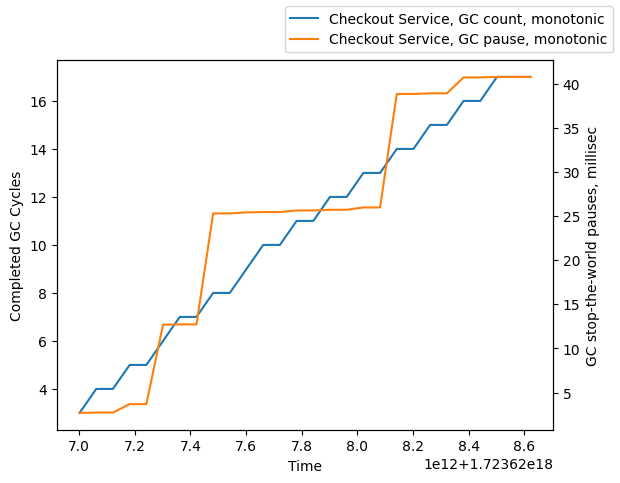

In [46]:
fig,axs_cnt = plot.subplots()
axs_ns = axs_cnt.twinx()

axs_cnt.plot(checkout_count_df.index, checkout_count_df['sum_int'],
             label='Checkout Service, GC count, monotonic',
             color=plot.rcParams['axes.prop_cycle'].by_key()['color'][0])
# also convert nanoseconds to milliseconds:
axs_ns.plot(checkout_pause_df.index, checkout_pause_df['sum_int'] / 1000000,
            label='Checkout Service, GC pause, monotonic',
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][1])

axs_cnt.set_xlabel('Time')
axs_cnt.set_ylabel('Completed GC Cycles')
axs_ns.set_ylabel('GC stop-the-world pauses, millisec')
fig.legend()

In [47]:
%%markdown

#### Monotonic metrics deltas

While the chart above is techinically correct, it's a bit hard to understand what exactly happened during each observation interval. So, this time, let's plot the `sum_delta` column that we computed above:


#### Monotonic metrics deltas

While the chart above is techinically correct, it's a bit hard to understand what exactly happened during each observation interval. So, this time, let's plot the `sum_delta` column that we computed above:


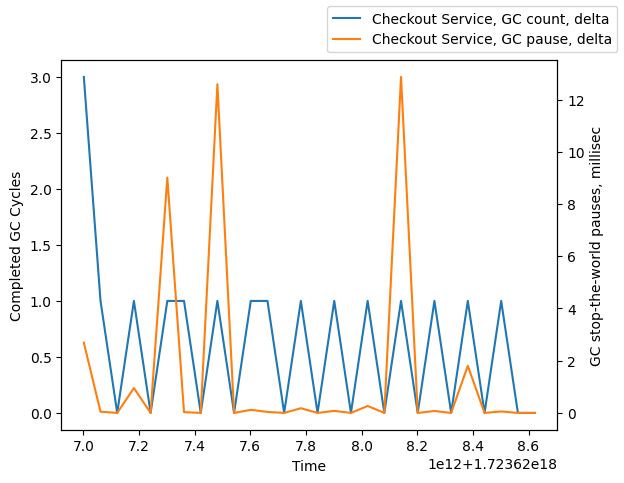

In [48]:
fig,axs_cnt = plot.subplots()
axs_ns = axs_cnt.twinx()

axs_cnt.plot(checkout_count_df.index, checkout_count_df['sum_delta'],
             label='Checkout Service, GC count, delta',
             color=plot.rcParams['axes.prop_cycle'].by_key()['color'][0])
# Again, convert nanosec to millisec:
axs_ns.plot(checkout_pause_df.index, checkout_pause_df['sum_delta'] / 1000000,
            label='Checkout Service, GC pause, delta',
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][1])

axs_cnt.set_xlabel('Time')
axs_cnt.set_ylabel('Completed GC Cycles')
axs_ns.set_ylabel('GC stop-the-world pauses, millisec')
fig.legend()

In [49]:
%%markdown

# Gaps in observation sessions

In the following plot we'll illustrate how the `start_time_unix_nano` column can help you interpret `metrics` data correctly, without a complicated logic to specifically check for gaps in time.

Let's plot the two `process.runtime.go.gc*` metrics for the Product Catalog demo service. Remember - earlier we showed that this time our data has a gap:


# Gaps in observation sessions

In the following plot we'll illustrate how the `start_time_unix_nano` column can help you interpret `metrics` data correctly, without a complicated logic to specifically check for gaps in time.

Let's plot the two `process.runtime.go.gc*` metrics for the Product Catalog demo service. Remember - earlier we showed that this time our data has a gap:


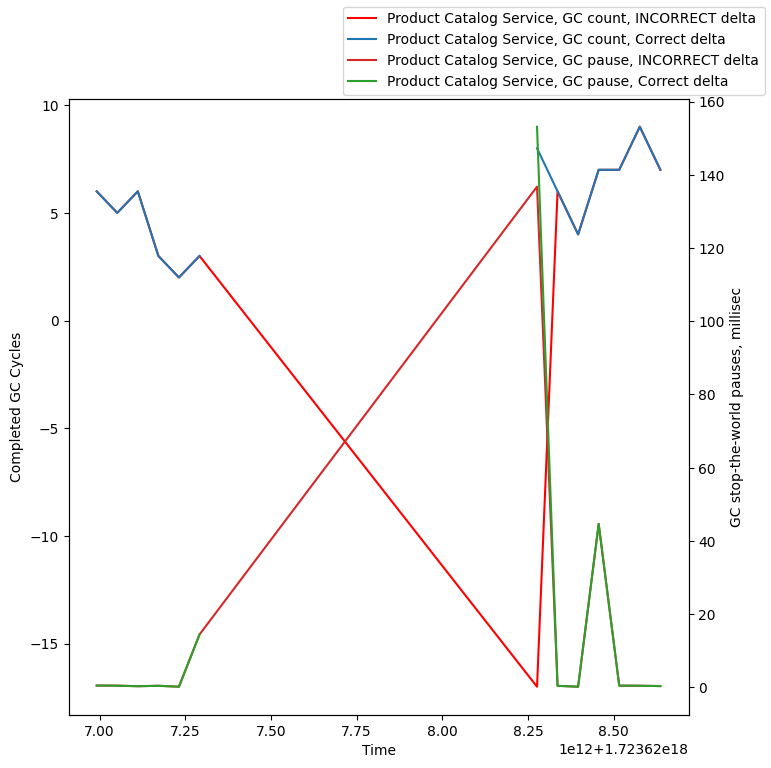

In [50]:
# to illustrate what happens if start_time_unix_nano is ignored, build some 'wrong' DataFrames:
w_count_df=sums_df[
    (sums_df['name'] == 'process.runtime.go.gc.count') & (sums_df['emitter'] == 'go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice')
][
    ['time_unix_nano', 'sum_int']
].groupby(['time_unix_nano']).sum()
w_count_df=w_count_df.sort_values(['time_unix_nano'])
w_count_df['sum_delta'] = w_count_df['sum_int'] - w_count_df['sum_int'].shift(1, fill_value=0)

w_pause_df=sums_df[
    (sums_df['name'] == 'process.runtime.go.gc.pause_total_ns') & (sums_df['emitter'] == 'go.opentelemetry.io/contrib/instrumentation/runtime@productcatalogservice')
][
    ['time_unix_nano', 'sum_int']
].groupby(['time_unix_nano']).sum()
w_pause_df=w_pause_df.sort_values(['time_unix_nano'])
w_pause_df['sum_delta'] = w_pause_df['sum_int'] - w_pause_df['sum_int'].shift(1, fill_value=0)


fig,axs_cnt = plot.subplots()
axs_ns = axs_cnt.twinx()

axs_cnt.plot(w_count_df.index, w_count_df['sum_delta'],
            label='Product Catalog Service, GC count, INCORRECT delta',
            color='r')
axs_cnt.plot(catalog_count1_df.index, catalog_count1_df['sum_delta'],
            label='Product Catalog Service, GC count, Correct delta',
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][0])
axs_cnt.plot(catalog_count2_df.index, catalog_count2_df['sum_delta'],
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][0])

axs_ns.plot(w_pause_df.index, w_pause_df['sum_delta'] / 1000000,
            label='Product Catalog Service, GC pause, INCORRECT delta',
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][3])
axs_ns.plot(catalog_pause1_df.index, catalog_pause1_df['sum_delta'] / 1000000,
            label='Product Catalog Service, GC pause, Correct delta',
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][2])
axs_ns.plot(catalog_pause2_df.index, catalog_pause2_df['sum_delta'] / 1000000,
            color=plot.rcParams['axes.prop_cycle'].by_key()['color'][2])

axs_cnt.set_xlabel('Time')
axs_cnt.set_ylabel('Completed GC Cycles')
axs_ns.set_ylabel('GC stop-the-world pauses, millisec')
fig.set_figwidth(8)
fig.set_figheight(8)
fig.legend()

In [51]:
%%markdown

## Sum values

Sum `metrics` are further split into two sub-types, depending on if they're reported in ***integers*** or ***doubles***. The former will have a `sum_type` equal to `AS_INT` and its actual value in `sum_int`. 
The latter - a `sum_type` of `AS_DOUBLE` and the value in `sum_double`.

Just like with the Gauge `metrics` above - we'll create a new DataFrame to avoid using the same check again and again (to be used later):


## Sum values

Sum `metrics` are further split into two sub-types, depending on if they're reported in ***integers*** or ***doubles***. The former will have a `sum_type` equal to `AS_INT` and its actual value in `sum_int`. 
The latter - a `sum_type` of `AS_DOUBLE` and the value in `sum_double`.

Just like with the Gauge `metrics` above - we'll create a new DataFrame to avoid using the same check again and again (to be used later):


In [52]:
sums_values_df=pd.concat([
    sums_df[sums_df['sum_type'] == 'AS_INT'][['sum_int']].rename(columns={'sum_int': 'value'}),
    sums_df[sums_df['sum_type'] == 'AS_DOUBLE'][['sum_double']].rename(columns={'sum_double': 'value'})
])

In [53]:
%%markdown

# Histogram metrics

Another way you can 'aggregate' measurements is to use a histogram `metric`. As the name suggests - OpenTelemetry will transmit a histogram of observed measurements, allowing you to have a bit more information on the metric compared to `SUMs` and `GAUGEs`.

Histograms essentially **split** the potential values of the metric into ranges (called **buckets**), like - 0 to 5, 5 to 10, 10 to 25 and so on. When your code supplies a new observation of the metric - OpenTelemetry finds which bucket this observation belongs to and 
increases a counter for that bucket. Or in other words histograms are **counting** how many observations were made per range of values seen. Again, over a period of time.

For examples, take a look at the table below. Some of the columns were introduced earlier and they have the same meaning here. The histogram-specific columns to look at are:
- `histogram_count` - giving the total number of observations (basically all values in all `histogram_bucket_counts` added together)
- `histogram_sum` - the sum of ***only the positive*** `metric` values observed, with ***negative values IGNORED;*** the sum is **monotonic** (see above for monotinic sums)
- `histogram_min` and `histogram_max` - the minimum and maximum values observed
- `histogram_bucket_counts` - the counters per bucket
- `histogram_explicit_bounds` - the ranges for the buckets

We'll explore these later, but for now - take a look at some examples, as emitted by our demo Astronomy webshop:


# Histogram metrics

Another way you can 'aggregate' measurements is to use a histogram `metric`. As the name suggests - OpenTelemetry will transmit a histogram of observed measurements, allowing you to have a bit more information on the metric compared to `SUMs` and `GAUGEs`.

Histograms essentially **split** the potential values of the metric into ranges (called **buckets**), like - 0 to 5, 5 to 10, 10 to 25 and so on. When your code supplies a new observation of the metric - OpenTelemetry finds which bucket this observation belongs to and 
increases a counter for that bucket. Or in other words histograms are **counting** how many observations were made per range of values seen. Again, over a period of time.

For examples, take a look at the table below. Some of the columns were introduced earlier and they have the same meaning here. The histogram-specific columns to look at are:
- `histogram_count` - giving the total number of observations (basically all values in all `histogram_bucket_counts` added together)
- `histogram_sum` - the sum of ***only the positive*** `metric` values observed, with ***negative values IGNORED;*** the sum is **monotonic** (see above for monotinic sums)
- `histogram_min` and `histogram_max` - the minimum and maximum values observed
- `histogram_bucket_counts` - the counters per bucket
- `histogram_explicit_bounds` - the ranges for the buckets

We'll explore these later, but for now - take a look at some examples, as emitted by our demo Astronomy webshop:


In [54]:
histograms_df=metrics_df[metrics_df['type'] == 'HISTOGRAM']
histograms_df[
    [
        'name', 'description', 'unit', 'type',
        'histogram_count', 'histogram_sum', 'histogram_min', 'histogram_max',
        'histogram_bucket_counts', 'histogram_explicit_bounds',
        'start_time_unix_nano', 'time_unix_nano', 'aggregation_temporality'
    ]
].head(10)

,name,description,unit,type,histogram_count,histogram_sum,histogram_min,histogram_max,histogram_bucket_counts,histogram_explicit_bounds,start_time_unix_nano,time_unix_nano,aggregation_temporality
7,http.server.duration,Measures the duration of inbound HTTP requests.,s,HISTOGRAM,1,0.001969,0.001969,0.001969,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865405138,1723626941865978359,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
8,http.server.duration,Measures the duration of inbound HTTP requests.,s,HISTOGRAM,3,0.016641,0.001891,0.010135,"[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865405138,1723626941865978359,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
9,http.server.duration,Measures the duration of inbound HTTP requests.,s,HISTOGRAM,3,0.003235,0.000437,0.002229,"[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865405138,1723626941865978359,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
10,http.server.response.size,Measures the size of HTTP request messages (compressed).,By,HISTOGRAM,3,132.0,44.0,44.0,"[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865419451,1723626941865985661,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
11,http.server.response.size,Measures the size of HTTP request messages (compressed).,By,HISTOGRAM,3,117.0,39.0,39.0,"[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865419451,1723626941865985661,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
12,http.server.response.size,Measures the size of HTTP request messages (compressed).,By,HISTOGRAM,1,235.0,235.0,235.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626929865419451,1723626941865985661,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
39,http.client.duration,measures the duration of the outbound HTTP request,ms,HISTOGRAM,1,5000.0,5000.0,5000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626935111098393,1723626943634161700,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
40,http.client.duration,measures the duration of the outbound HTTP request,ms,HISTOGRAM,5,9000.0,1000.0,3000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626935111098393,1723626943634161700,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
41,http.client.duration,measures the duration of the outbound HTTP request,ms,HISTOGRAM,2,3000.0,1000.0,2000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626935111098393,1723626943634161700,b'AGGREGATION_TEMPORALITY_CUMULATIVE'
42,http.client.duration,measures the duration of the outbound HTTP request,ms,HISTOGRAM,4,1664000.0,26000.0,836000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626935111098393,1723626943634161700,b'AGGREGATION_TEMPORALITY_CUMULATIVE'


In [55]:
%%markdown

#### A histogram metric

Let's pick one histogram `metric` from our demo data set and explore it over time:


#### A histogram metric

Let's pick one histogram `metric` from our demo data set and explore it over time:


In [56]:
frontend_duration_df=histograms_df[(histograms_df['name'] == 'http.server.duration') & (histograms_df['emitter'] == '@opentelemetry/instrumentation-http@frontend')]
frontend_duration_df.dropna(axis=1, how='all').head(10)

,name,description,unit,type,histogram_count,histogram_sum,histogram_min,histogram_max,histogram_bucket_counts,histogram_explicit_bounds,start_time_unix_nano,time_unix_nano,aggregation_temporality,a_http.flavor,a_http.method,a_http.scheme,a_http.status_code,a_net.host.name,a_net.host.port,emitter
1727,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,575,9994.394065,0.825294,828.055515,"[0, 195, 136, 153, 64, 13, 6, 5, 1, 1, 1, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626940989000000,1723626992168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,200,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
1728,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,26,25.779279,0.442361,3.004565,"[0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626941139000000,1723626992168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,308,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
1729,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,3,747.769508,9.542451,607.283459,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626979040000000,1723626992168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,POST,http,200,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
3577,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,1219,21869.365128,0.769753,1810.788853,"[0, 476, 306, 290, 100, 24, 6, 7, 5, 1, 1, 3, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626940989000000,1723627052168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,200,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
3578,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,57,49.725442,0.427357,3.004565,"[0, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626941139000000,1723627052168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,308,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
3579,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,10,1092.908814,6.764419,607.283459,"[0, 0, 3, 2, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626979040000000,1723627052168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,POST,http,200,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
4520,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,1922,66145.705966,0.604467,5014.63826,"[0, 919, 469, 354, 119, 29, 6, 8, 5, 1, 1, 3, 0, 8, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626940989000000,1723627112168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,200,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
4521,http.server.duration,Measures the duration of inbound HTTP requests.,ms,HISTOGRAM,96,75.230985,0.281628,3.004565,"[0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 1...",1723626941139000000,1723627112168000000,b'AGGREGATION_TEMPORALITY_CUMULATIVE',1.1,GET,http,308,opentelemetry-demo-frontendproxy,8080.0,@opentelemetry/instrumentation-http@frontend
4522,http.server.duration,Measures the

In [57]:
%%markdown

#### A single histogram

Let's plot a **single data point** of a histogram `metric` (the first row in the table above):

***Note:*** the ***average request duration*** is not present in the data, it is computed in the code below.


#### A single histogram

Let's plot a **single data point** of a histogram `metric` (the first row in the table above):

***Note:*** the ***average request duration*** is not present in the data, it is computed in the code below.


Text(0.5, 0.01, 'Duration of inbound HTTP requests at unix time 1723626992168000000')

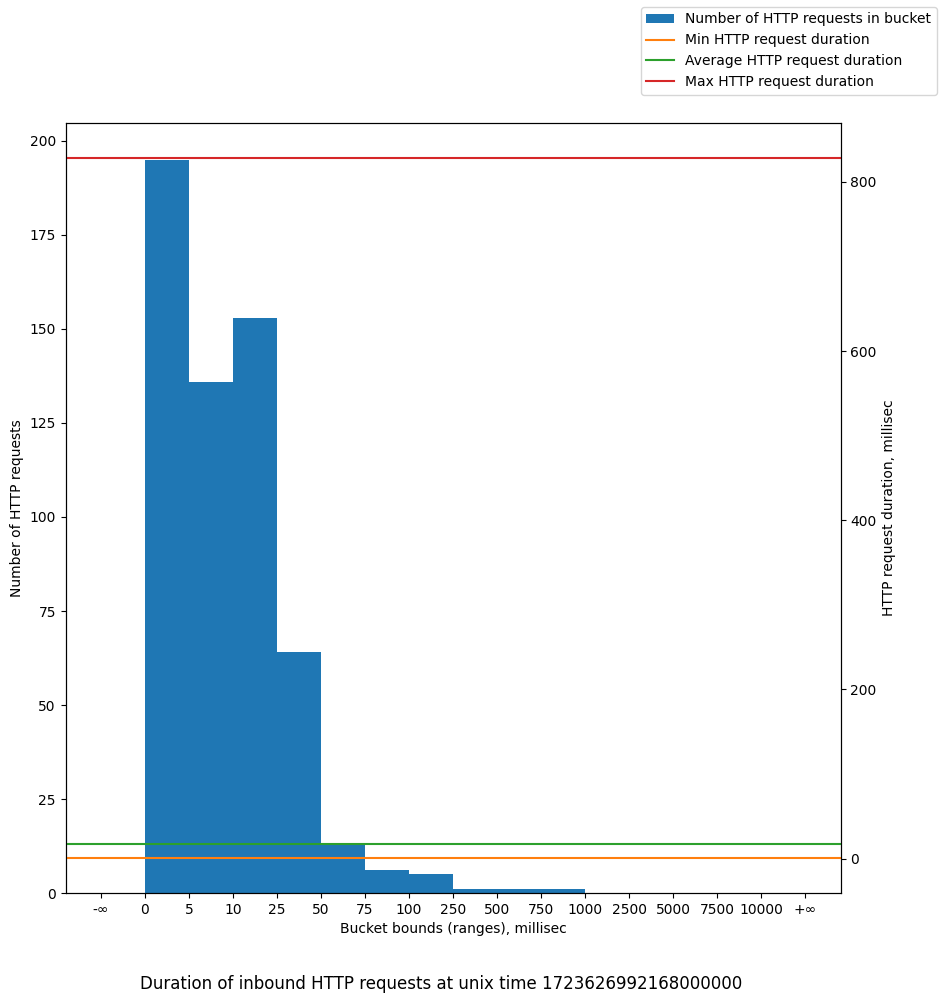

In [58]:
fig,axs_cnt = plot.subplots()
axs_ms = axs_cnt.twinx()

axs_cnt.stairs(
    frontend_duration_df.iloc[0]['histogram_bucket_counts'],
    np.concatenate((['-∞'], ['%.0f' % x for x in frontend_duration_df.iloc[0]['histogram_explicit_bounds']], ['+∞'])),
    fill=True,
    label='Number of HTTP requests in bucket')

axs_ms.axhline(
    y=frontend_duration_df.iloc[0]['histogram_min'],
    label='Min HTTP request duration',
    color=plot.rcParams['axes.prop_cycle'].by_key()['color'][1])
# plot the average of request durations:
axs_ms.axhline(
    y=frontend_duration_df.iloc[0]['histogram_sum'] / frontend_duration_df.iloc[0]['histogram_count'],
    label='Average HTTP request duration',
    color=plot.rcParams['axes.prop_cycle'].by_key()['color'][2])
axs_ms.axhline(
    y=frontend_duration_df.iloc[0]['histogram_max'],
    label='Max HTTP request duration',
    color=plot.rcParams['axes.prop_cycle'].by_key()['color'][3])

axs_cnt.set_xlabel('Bucket bounds (ranges), millisec')
axs_cnt.set_ylabel('Number of HTTP requests')
axs_ms.set_ylabel('HTTP request duration, millisec')
fig.legend()
fig.set_figwidth(10)
fig.set_figheight(10)
fig.supxlabel('Duration of inbound HTTP requests at unix time ' + frontend_duration_df.iloc[0]['time_unix_nano'].astype('str'))

In [59]:
%%markdown

## 'Explode' histograms for easier processing

Due to their multi-valued structure histograms are a bit tricky to analyze over time. In this example we'll 'explode' them - that is - we'll turn each count of each bucket
into an individual row (plus a few more). We'll also label each new row so that we know where it came from (in the `population_stat` column).

Take a look at the following transformation and the table below it:


## 'Explode' histograms for easier processing

Due to their multi-valued structure histograms are a bit tricky to analyze over time. In this example we'll 'explode' them - that is - we'll turn each count of each bucket
into an individual row (plus a few more). We'll also label each new row so that we know where it came from (in the `population_stat` column).

Take a look at the following transformation and the table below it:


In [60]:
def otel_histogram(series):
    def bucket_names(bounds):
        if bounds.size > 0:
            return [f'lt_{bounds[i]}' if i == 0 else f'gt_{bounds[i-1]}' if i == bounds.size else f'{bounds[i-1]}-{bounds[i]}' for i in range(bounds.size + 1)]
        else:
            return []

    return pd.Series([
        [
            series['histogram_count'],
            series['histogram_sum'],
            series['histogram_min'],
            series['histogram_max'],
            *series['histogram_bucket_counts']
        ],
        [
            'count',
            'sum',
            'min',
            'max',
            *bucket_names(series['histogram_explicit_bounds'])
        ]
    ], index=['value', 'population_stat'])

histograms_values_df=histograms_df.apply(otel_histogram, axis=1).explode(['value', 'population_stat'])
histograms_values_df.head(25)

,value,population_stat
7,1,count
7,0.001969,sum
7,0.001969,min
7,0.001969,max
7,0,lt_0.0
7,1,0.0-5.0
7,0,5.0-10.0
7,0,10.0-25.0
7,0,25.0-50.0
7,0,50.0-75.0


In [61]:
%%markdown

#### Histogram buckets (or ranges):

In the table above we've 'exploded' a single histogram metric data point into muliple rows - one for each of the `count`, `sum`, `min` and `max` stats, and also a row per bucket (range).

The way bucket bounds are saved (in the `histogram_explicit_bounds` array) is this:
- each array element is the upper bound of a bucket, inclusive. The first array element covers values from minus infinity to itself, inclusive (0.0 in our example). We've marked it as `lt_0.0`.

  Subsequent array elements represent a range from previous (exclusive) to current (inclusive). For example - 0.0 (exclusive) to 5.0 (inclusive). We've marked these as `0.0-5.0` and similar.

- the last array element also defines the range from its value (exclusive) to plus infinity. In the table above it's marked as `gt_10000.0`.


#### Histogram buckets (or ranges):

In the table above we've 'exploded' a single histogram metric data point into muliple rows - one for each of the `count`, `sum`, `min` and `max` stats, and also a row per bucket (range).

The way bucket bounds are saved (in the `histogram_explicit_bounds` array) is this:
- each array element is the upper bound of a bucket, inclusive. The first array element covers values from minus infinity to itself, inclusive (0.0 in our example). We've marked it as `lt_0.0`.

  Subsequent array elements represent a range from previous (exclusive) to current (inclusive). For example - 0.0 (exclusive) to 5.0 (inclusive). We've marked these as `0.0-5.0` and similar.

- the last array element also defines the range from its value (exclusive) to plus infinity. In the table above it's marked as `gt_10000.0`.


In [62]:
%%markdown

#### Let's create a new DataFrame for our example metric with these new rows:


#### Let's create a new DataFrame for our example metric with these new rows:


In [63]:
new_frontend_duration_df=frontend_duration_df[
    [
        'start_time_unix_nano', 'time_unix_nano',
        'a_http.method', 'a_http.status_code'
    ]
].join(histograms_values_df.loc[frontend_duration_df.index]).sort_values(by=['a_http.method', 'a_http.status_code', 'population_stat', 'start_time_unix_nano', 'time_unix_nano'])

new_frontend_duration_df.head(10)

,start_time_unix_nano,time_unix_nano,a_http.method,a_http.status_code,value,population_stat
1727,1723626940989000000,1723626992168000000,GET,200,195,0.0-5.0
3577,1723626940989000000,1723627052168000000,GET,200,476,0.0-5.0
4520,1723626940989000000,1723627112168000000,GET,200,919,0.0-5.0
33922,1723626940989000000,1723627172168000000,GET,200,1290,0.0-5.0
34878,1723626940989000000,1723627232168000000,GET,200,1497,0.0-5.0
35811,1723626940989000000,1723627292172000000,GET,200,1831,0.0-5.0
49545,1723626940989000000,1723627352169000000,GET,200,1954,0.0-5.0
51310,1723626940989000000,1723627412169000000,GET,200,2140,0.0-5.0
52202,1723626940989000000,1723627472168000000,GET,200,2479,0.0-5.0
55456,1723626940989000000,1723627532169000000,GET,200,2715,0.0-5.0


In [64]:
%%markdown

### Plotting Histograms

Our example metric - `http.server.duration` has data points for various request methods and HTTP status codes. To keep things simple we'll only 
consider `GET` methods with status code `200` (**success**). We'll not plot all of the `population_stats` for the same reason.

In your own analytics you can use the same method to also plot **failed** or `POST` requests.


### Plotting Histograms

Our example metric - `http.server.duration` has data points for various request methods and HTTP status codes. To keep things simple we'll only 
consider `GET` methods with status code `200` (**success**). We'll not plot all of the `population_stats` for the same reason.

In your own analytics you can use the same method to also plot **failed** or `POST` requests.


In [65]:
# prepare some 'selectors' for our DataFrame
# selectors for the two 'sessions' of GET, 200 requests in our demo data:
get200_interval_1=(new_frontend_duration_df['a_http.method'] == 'GET') & (new_frontend_duration_df['a_http.status_code'] == 200) & (new_frontend_duration_df['start_time_unix_nano'] == 1723626940989000000)
get200_interval_2=(new_frontend_duration_df['a_http.method'] == 'GET') & (new_frontend_duration_df['a_http.status_code'] == 200) & (new_frontend_duration_df['start_time_unix_nano'] == 1723627054875000000)
# a selector for the GET, 500 requests (data for it does not contain a gap): 
get500=(new_frontend_duration_df['a_http.method'] == 'GET') & (new_frontend_duration_df['a_http.status_code'] == 500)
# same as above, but for POST requests:
post200_interval_1=(new_frontend_duration_df['a_http.method'] == 'POST') & (new_frontend_duration_df['a_http.status_code'] == 200) & (new_frontend_duration_df['start_time_unix_nano'] == 1723626979040000000)
post200_interval_2=(new_frontend_duration_df['a_http.method'] == 'POST') & (new_frontend_duration_df['a_http.status_code'] == 200) & (new_frontend_duration_df['start_time_unix_nano'] == 1723627069470000000)
post500=(new_frontend_duration_df['a_http.method'] == 'POST') & (new_frontend_duration_df['a_http.status_code'] == 500)
# a few population_stat selectors:
pop_0_5=new_frontend_duration_df['population_stat'] == '0.0-5.0'
pop_5_10=new_frontend_duration_df['population_stat'] == '5.0-10.0'
pop_10_25=new_frontend_duration_df['population_stat'] == '10.0-25.0'
pop_25_50=new_frontend_duration_df['population_stat'] == '25.0-50.0'

pop_gt10000=new_frontend_duration_df['population_stat'] == 'gt_10000.0'

pop_count=new_frontend_duration_df['population_stat'] == 'count'
pop_sum=new_frontend_duration_df['population_stat'] == 'sum'
pop_min=new_frontend_duration_df['population_stat'] == 'min'
pop_max=new_frontend_duration_df['population_stat'] == 'max'

In [66]:
%%markdown

#### Minimum and average durations:


#### Minimum and average durations:


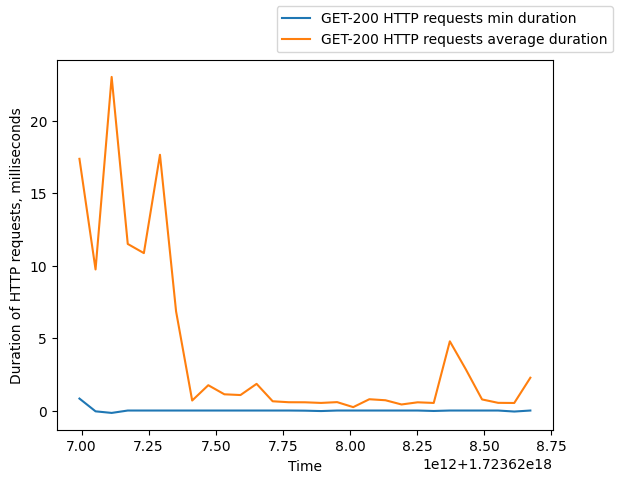

In [67]:
fig,axs=plot.subplots()

axs.plot(
    new_frontend_duration_df[get200_interval_1 & pop_min]['time_unix_nano'],
    new_frontend_duration_df[get200_interval_1 & pop_min]['value'] - 
        new_frontend_duration_df[get200_interval_1 & pop_min]['value'].shift(1, fill_value=0.0),
    label='GET-200 HTTP requests min duration',
    color=plot.rcParams['axes.prop_cycle'].by_key()['color'][0]
)
axs.plot(
    new_frontend_duration_df[get200_interval_1 & pop_sum]['time_unix_nano'],
    (new_frontend_duration_df[get200_interval_1 & pop_sum]['value'] - 
         new_frontend_duration_df[get200_interval_1 & pop_sum]['value'].shift(1, fill_value=0.0)) / 
            new_frontend_duration_df[get200_interval_1 & pop_count]['value'],
    label='GET-200 HTTP requests average duration',
    color=plot.rcParams['axes.prop_cycle'].by_key()['color'][1]
)

axs.set_xlabel('Time')
axs.set_ylabel('Duration of HTTP requests, milliseconds')
fig.legend()

In [68]:
%%markdown

#### A few histogram bucket counts:


#### A few histogram bucket counts:


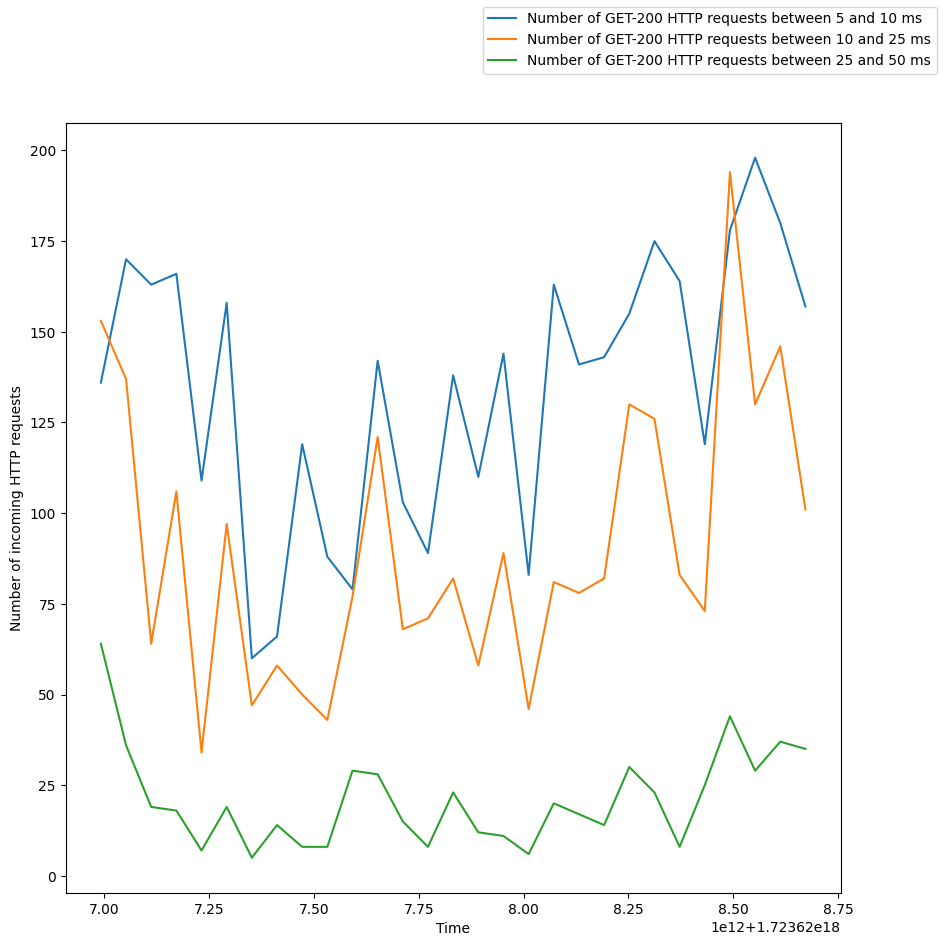

In [69]:
fig,axs_cnt=plot.subplots()

axs_cnt.plot(
    new_frontend_duration_df[get200_interval_1 & pop_5_10]['time_unix_nano'],
    new_frontend_duration_df[get200_interval_1 & pop_5_10]['value'] - 
        new_frontend_duration_df[get200_interval_1 & pop_5_10]['value'].shift(1, fill_value=0.0),
    label='Number of GET-200 HTTP requests between 5 and 10 ms'
)
axs_cnt.plot(
    new_frontend_duration_df[get200_interval_1 & pop_10_25]['time_unix_nano'],
    new_frontend_duration_df[get200_interval_1 & pop_10_25]['value'] - 
        new_frontend_duration_df[get200_interval_1 & pop_10_25]['value'].shift(1, fill_value=0.0),
    label='Number of GET-200 HTTP requests between 10 and 25 ms'
)
axs_cnt.plot(
    new_frontend_duration_df[get200_interval_1 & pop_25_50]['time_unix_nano'],
    new_frontend_duration_df[get200_interval_1 & pop_25_50]['value'] - 
        new_frontend_duration_df[get200_interval_1 & pop_25_50]['value'].shift(1, fill_value=0.0),
    label='Number of GET-200 HTTP requests between 25 and 50 ms'
)

axs_cnt.set_xlabel('Time')
axs_cnt.set_ylabel('Number of incoming HTTP requests')
fig.legend()
fig.set_figwidth(10)
fig.set_figheight(10)

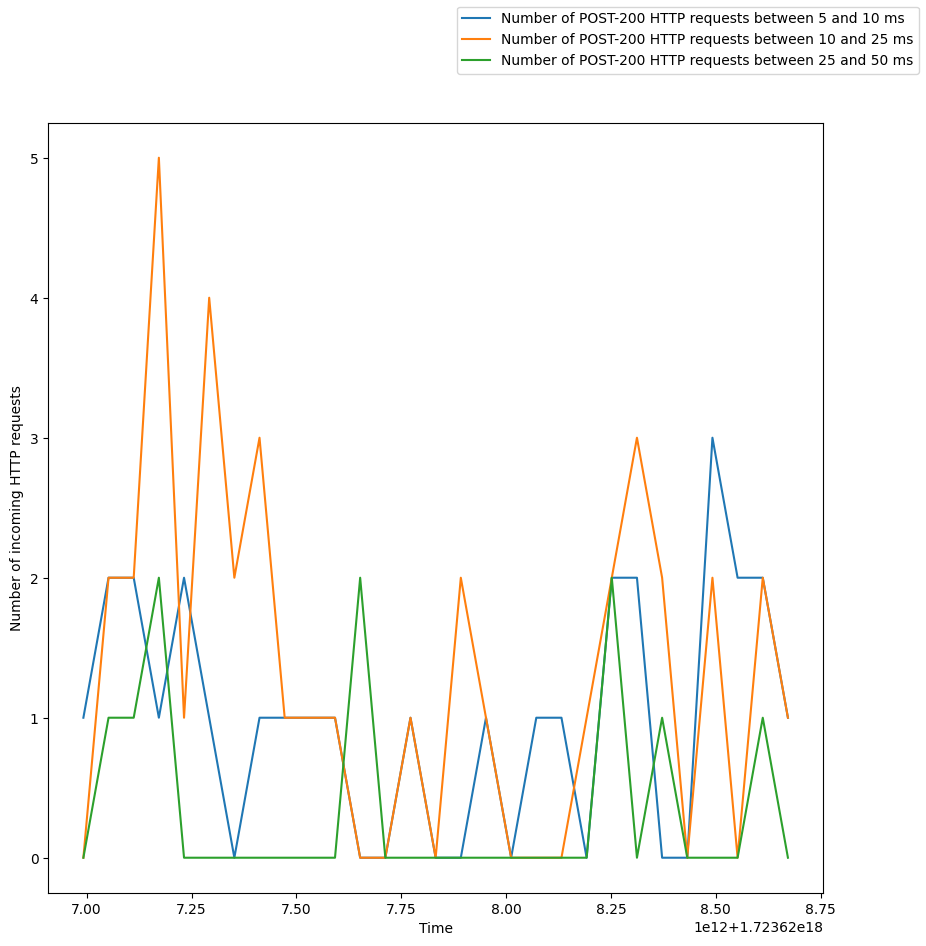

In [70]:
fig,axs_cnt=plot.subplots()

axs_cnt.plot(
    new_frontend_duration_df[post200_interval_1 & pop_5_10]['time_unix_nano'],
    new_frontend_duration_df[post200_interval_1 & pop_5_10]['value'] - 
        new_frontend_duration_df[post200_interval_1 & pop_5_10]['value'].shift(1, fill_value=0.0),
    label='Number of POST-200 HTTP requests between 5 and 10 ms'
)
axs_cnt.plot(
    new_frontend_duration_df[post200_interval_1 & pop_10_25]['time_unix_nano'],
    new_frontend_duration_df[post200_interval_1 & pop_10_25]['value'] - 
        new_frontend_duration_df[post200_interval_1 & pop_10_25]['value'].shift(1, fill_value=0.0),
    label='Number of POST-200 HTTP requests between 10 and 25 ms'
)
axs_cnt.plot(
    new_frontend_duration_df[post200_interval_1 & pop_25_50]['time_unix_nano'],
    new_frontend_duration_df[post200_interval_1 & pop_25_50]['value'] - 
        new_frontend_duration_df[post200_interval_1 & pop_25_50]['value'].shift(1, fill_value=0.0),
    label='Number of POST-200 HTTP requests between 25 and 50 ms'
)

axs_cnt.set_xlabel('Time')
axs_cnt.set_ylabel('Number of incoming HTTP requests')
fig.legend()
fig.set_figwidth(10)
fig.set_figheight(10)

In [71]:
%%markdown

# Considerations when developing your own metrics

If you're new to implementing telemetry into your own apps you might be wondering how to decide which metric type to use and when. So, here are a few 
questions you may ask yourself when facing such choices.

- ***Is my metric observable in its entirety?***
    
    Think about the CPU usage metric above - it changes so often, that whatever code tries to collect it will certainly miss some values.
    In such cases - use a `GAUGE`. A `SUM`, for example, relies a lot on absorbing all changes to provide correct and useful results.
    If you know some changes will be missed - `SUMs` (and `HISTOGRAMs`) will probably mislead your analytics when not observed in entirety.
    
    `GAUGES`, on the other hand, are reported only at the end of an observational interval and miss all values during that interval anyway. If 
    that's a worry - you can tweak the reporting interval to match a desired frequency.

    A counter-example is, perhaps, when measuring how many requests has your app handled. In this case, your code ***DOES*** see all incoming requests 
    and can surely count each one of them. So, a `SUM` (or a `HISTOGRAM`) will be more useful. You can also do some computations over it and other 
    metrics safely.

- ***Is my metric additive?***

    Some measurements, like counts or durations, can be added together and are thus good candidates for `SUM` or `HISTOGRAM` metrics.
    For others - it doesn't really make sense.
    
    Consider a queue that you have implemented in your app and want to observe its size, as it changes over time. If, at one point your queue
    has 5 elements, then your code adds some new elements and removes a few, leading to a total queue size of 7 - it doesn't really make sense to
    report 12 for your *queue size* metric. Which is exactly what would happen if your metric is a `SUM` metric. A `GAUGE` will correctly report 
    the value of 7 in this case.

    On the other hand, as your code knows about all additions and removals it does on the queue - it might be a better idea to report **two SUM** 
    metrics instead - one for additions to the queue and another for removals. While `SUM` metrics can go down (like with an `UpDownCounter`) you 
    might be better off by tracking both processes separately. You will get details for both - how items get into the queue and 
    how they leave it, and also, by doing a simple subtraction you can get the end queue size as well.

- ***Does the magnitude of my metric have an effect on performance?***

    In the **queue size** example above we made the assumption that all queue items are 'equal', that is - that queuing or processing an item takes 
    about the same time and resources as any other item that may end up there.

    This is not always the case though. Consider a queue that contains buffers of various sizes, and the bigger the buffer is - the slower it is to 
    process it; the more memory is used, etc. In such cases a `SUM` metric might not be sufficient to get a good view over your running application.
    For example - a queue of 5 ten-megabyte buffers might be harder to process than a queue of 50 one-megabyte buffers. A `SUM` metric will 
    report '50 megabytes' in both cases, but if your code performance is disproportionate - you better use a `HISTOGRAM` and track '1-to-10 MB items',
    '10-20 MB items' and so on.

- ***I'm measuring the quality of service delivered to my users?***

    In the `HISTOGRAM` data points example above we used a metric of how long it takes to handle an incoming HTTP request. For a web app (such as 
    the [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) used to capture this metrics data set) this is an important metric that directly observes the quality users get. Or in other 
    words, it's a metric that captures an aspect of the final **output** if your app, an aspect of what it **delivers.**

    In these situations you might want to use a `HISTOGRAM`, because of the greater detail that it offers. It is a safer choice - in your initial 
    implementations you might have missed measuring an important **internal** process, but its effect will still be observable at the final **output** - 
    where your app delivers.

    Seing that, for example, request handling times increase (getting higher counts in the 'higher' buckets) is a sure indication of a pile up somewhere 
    within your app. Initially, you might not have the right internal metric to figure out where that pile up is happening exactly, but you won't miss the degradation, 
    and investigating 'why' will surely give you ideas on what other metrics you want to add to your code!

- ***Do I actually want to measure or do I prefer to trace?***

    OpenTelemetry has another signal - `trace` that wraps around blocks of your code (not necessarily countinuous blocks). Every time your code enters such 
    a wrapped code a new `trace` will be recorded, and it will contain start and end timestamps (useful to compute a duration), parameters, you can 
    record custom events happening inside, or correlate other signals (such as `logs` or even `metrics`!). Moreover, `traces` are broken into `spans`,
    and `spans` can be nested, giving you the finest level of detail you might need.

    With some more (and heavier) data processing, you can 'convert' these `spans` and `traces` into a variety of metrics, without actually implementing 
    metrics in your code.

    To find out more about the `traces` signal - go to our [basics notebook.](basics.ipynb) For now, we're just mentioning `traces` here as another 
    option OpenTelemetry gives you. Deciding if you would like to implement a `trace` or a `metric` in your code is a delicate balance between level 
    of detail needed and how much data processing you're prepared to do. Metrics are lighter (compared to traces) and typically provide enough detail,
    but we would recommend to consider both!

- ***Does OpenTelemetry already have the metric I want?***

    Before jumping to implementing your own metric, take a look at the [OpenTelemetry Docs for your programming language](https://opentelemetry.io/docs/languages/)
    and see if there's already an **out-of-the-box** plugin that can provide similar information. At the beginning of this notebook we showed a quick list of `metric`
    names - our demo data set contains more than 200 of them! The vast majority come from `auto-instrumentation plugins`, meaining, no extra code was needed to get them! 


# Considerations when developing your own metrics

If you're new to implementing telemetry into your own apps you might be wondering how to decide which metric type to use and when. So, here are a few 
questions you may ask yourself when facing such choices.

- ***Is my metric observable in its entirety?***
    
    Think about the CPU usage metric above - it changes so often, that whatever code tries to collect it will certainly miss some values.
    In such cases - use a `GAUGE`. A `SUM`, for example, relies a lot on absorbing all changes to provide correct and useful results.
    If you know some changes will be missed - `SUMs` (and `HISTOGRAMs`) will probably mislead your analytics when not observed in entirety.
    
    `GAUGES`, on the other hand, are reported only at the end of an observational interval and miss all values during that interval anyway. If 
    that's a worry - you can tweak the reporting interval to match a desired frequency.

    A counter-example is, perhaps, when measuring how many requests has your app handled. In this case, your code ***DOES*** see all incoming requests 
    and can surely count each one of them. So, a `SUM` (or a `HISTOGRAM`) will be more useful. You can also do some computations over it and other 
    metrics safely.

- ***Is my metric additive?***

    Some measurements, like counts or durations, can be added together and are thus good candidates for `SUM` or `HISTOGRAM` metrics.
    For others - it doesn't really make sense.
    
    Consider a queue that you have implemented in your app and want to observe its size, as it changes over time. If, at one point your queue
    has 5 elements, then your code adds some new elements and removes a few, leading to a total queue size of 7 - it doesn't really make sense to
    report 12 for your *queue size* metric. Which is exactly what would happen if your metric is a `SUM` metric. A `GAUGE` will correctly report 
    the value of 7 in this case.

    On the other hand, as your code knows about all additions and removals it does on the queue - it might be a better idea to report **two SUM** 
    metrics instead - one for additions to the queue and another for removals. While `SUM` metrics can go down (like with an `UpDownCounter`) you 
    might be better off by tracking both processes separately. You will get details for both - how items get into the queue and 
    how they leave it, and also, by doing a simple subtraction you can get the end queue size as well.

- ***Does the magnitude of my metric have an effect on performance?***

    In the **queue size** example above we made the assumption that all queue items are 'equal', that is - that queuing or processing an item takes 
    about the same time and resources as any other item that may end up there.

    This is not always the case though. Consider a queue that contains buffers of various sizes, and the bigger the buffer is - the slower it is to 
    process it; the more memory is used, etc. In such cases a `SUM` metric might not be sufficient to get a good view over your running application.
    For example - a queue of 5 ten-megabyte buffers might be harder to process than a queue of 50 one-megabyte buffers. A `SUM` metric will 
    report '50 megabytes' in both cases, but if your code performance is disproportionate - you better use a `HISTOGRAM` and track '1-to-10 MB items',
    '10-20 MB items' and so on.

- ***I'm measuring the quality of service delivered to my users?***

    In the `HISTOGRAM` data points example above we used a metric of how long it takes to handle an incoming HTTP request. For a web app (such as 
    the [demo Astronomy webshop](https://github.com/mishmash-io/opentelemetry-demos) used to capture this metrics data set) this is an important metric that directly observes the quality users get. Or in other 
    words, it's a metric that captures an aspect of the final **output** if your app, an aspect of what it **delivers.**

    In these situations you might want to use a `HISTOGRAM`, because of the greater detail that it offers. It is a safer choice - in your initial 
    implementations you might have missed measuring an important **internal** process, but its effect will still be observable at the final **output** - 
    where your app delivers.

    Seing that, for example, request handling times increase (getting higher counts in the 'higher' buckets) is a sure indication of a pile up somewhere 
    within your app. Initially, you might not have the right internal metric to figure out where that pile up is happening exactly, but you won't miss the degradation, 
    and investigating 'why' will surely give you ideas on what other metrics you want to add to your code!

- ***Do I actually want to measure or do I prefer to trace?***

    OpenTelemetry has another signal - `trace` that wraps around blocks of your code (not necessarily countinuous blocks). Every time your code enters such 
    a wrapped code a new `trace` will be recorded, and it will contain start and end timestamps (useful to compute a duration), parameters, you can 
    record custom events happening inside, or correlate other signals (such as `logs` or even `metrics`!). Moreover, `traces` are broken into `spans`,
    and `spans` can be nested, giving you the finest level of detail you might need.

    With some more (and heavier) data processing, you can 'convert' these `spans` and `traces` into a variety of metrics, without actually implementing 
    metrics in your code.

    To find out more about the `traces` signal - go to our [basics notebook.](basics.ipynb) For now, we're just mentioning `traces` here as another 
    option OpenTelemetry gives you. Deciding if you would like to implement a `trace` or a `metric` in your code is a delicate balance between level 
    of detail needed and how much data processing you're prepared to do. Metrics are lighter (compared to traces) and typically provide enough detail,
    but we would recommend to consider both!

- ***Does OpenTelemetry already have the metric I want?***

    Before jumping to implementing your own metric, take a look at the [OpenTelemetry Docs for your programming language](https://opentelemetry.io/docs/languages/)
    and see if there's already an **out-of-the-box** plugin that can provide similar information. At the beginning of this notebook we showed a quick list of `metric`
    names - our demo data set contains more than 200 of them! The vast majority come from `auto-instrumentation plugins`, meaining, no extra code was needed to get them! 


In [72]:
%%markdown
# Combine values and base metric attributes

In the examples above we created some simpler DataFrames to avoid repetitive logic (like selecting the correct value and 'exploding' histogram values).

In the following code we'll combine them into one DataFrame and save it for later use.

# Combine values and base metric attributes

In the examples above we created some simpler DataFrames to avoid repetitive logic (like selecting the correct value and 'exploding' histogram values).

In the following code we'll combine them into one DataFrame and save it for later use.


In [73]:
values_df=pd.concat([gauges_values_df, sums_values_df, histograms_values_df])

In [74]:
base_df=metrics_df.drop([
    'gauge_type',
    'gauge_int',
    'gauge_double',
    'sum_type',
    'sum_int',
    'sum_double',
    'histogram_count',
    'histogram_sum',
    'histogram_min',
    'histogram_max',
    'histogram_bucket_counts',
    'histogram_explicit_bounds'
], axis=1)

In [75]:
transformed_df=base_df.join(values_df)
# here - indexes (especially on histogram values, as they were expanded to rows) will be duplicated

In [76]:
# drop the index with 'repeated' values for histograms, get a new index with unique values
transformed_df = transformed_df.reset_index()

In [77]:
def otel_value_delta(ndarray):
    return ndarray[0] if ndarray.size == 1 else ndarray[1] - ndarray[0]

def otel_time_delta(ndarray):
    return 0 if ndarray.size == 1 else ndarray[0]

cols=list(transformed_df.columns)
cols.remove('time_unix_nano')
cols.remove('value')

window=transformed_df.groupby(by=cols, dropna=False).rolling(window=2, min_periods=1)

value_deltas=window[['value']].apply(otel_value_delta, raw=True).reset_index(level=cols, drop=True).rename(columns={'value': 'value_delta'})
time_deltas=window[['time_unix_nano']].apply(otel_time_delta, raw=True).reset_index(level=cols, drop=True).rename(columns={'time_unix_nano': 'prev_time_unix_nano'})


In [78]:
transformed_df['value_delta']=value_deltas['value_delta']
transformed_df['prev_time_unix_nano']=time_deltas['prev_time_unix_nano']

In [79]:
transformed_df.convert_dtypes().to_parquet('otel-demo-app/metrics_exploded.parquet', engine='pyarrow')